## Convolution

## Linear Convolution

It was previously shown, that the convolution is an important operation in the theory of signals and linear time-invariant (LTI) systems.
The *linear convolution* of two discrete signals $x[k]$ and $h[k]$ is defined as

\begin{equation}
x[k] * h[k] = \sum_{\kappa = -\infty}^{\infty} x[\kappa] \cdot h[k - \kappa] = \sum_{\kappa = -\infty}^{\infty} x[k - \kappa] \cdot h[\kappa]
\end{equation}

where $*$ is the most common short-hand notation of the convolution.
For multidimensional systems, sometimes a subscript is used to ensure clarity.
For example, here $*_k$ might be used to indicate the convolution with respect to $k$. Note, that the linear convolution needs to be clearly distinguished from the cyclic convolution introduced later.

In this notebook, the general properties of the linear convolution are discussed, followed by a geometrical interpretation of the operation.

### Graphical Interpretation

The convolution is commonly [interpreted in a graphical manner](https://en.wikipedia.org/wiki/Convolution#Visual_explanation).
This interpretation provides valuable insights into its calculation and allows to estimate the result.
The calculation of the sum for linear convolution

\begin{equation}
y[k] = x[k] * h[k] = \sum_{\kappa = -\infty}^{\infty} x[\kappa] \cdot h[k - \kappa]
\end{equation}


can be decomposed into four subsequent steps:

1. substitute $k$ by $\kappa$ in both $x[k]$ and $h[k]$,

2. time-reverse $h[\kappa]$ (reflection at vertical axis),

3. shift $h[- \kappa]$ by $k$ to yield $h[k - \kappa]$, i.e. a shift to **right** for $k>0$ or a shift to **left** for $k<0$,

4. check for which $k = -\infty \dots \infty$ the mirrored and shifted $h[k - \kappa]$ overlaps with $x[\kappa]$, calculate the specific sum for all the relevant $k$ to yield $y[k]$

This interpretation is illustrated in the following example using simple signals $x[k]$ and $h[k]$.

In [30]:
%matplotlib inline

In [31]:
import numpy as np

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

#plt.style.use('seaborn-v0_8-darkgrid')

In [32]:
def heaviside(k):
    return np.where(k >= 0, 1.0, 0.0)


def rect(k, N):
    return np.where((0 <= k) & (k < N), 1.0, 0.0)


def x(k):
    return 4/5 * rect(k, 6)


def h(k):
    return heaviside(k) * np.exp(- k/2)

def y(k):
    return np.convolve(x(k), h(k), mode='same')

def plot_signals(k, x, h, xlabel, hlabel, klabel):
    plt.figure(figsize=(8, 4))
    plt.stem(k, x, linefmt='C0-', markerfmt='C0o', label=xlabel)
    plt.stem(k, h, linefmt='C1-', markerfmt='C1o', label=hlabel)
    plt.xlabel(klabel)
    plt.legend()
    plt.ylim([0, 1.2])
    plt.grid(True)

The signals $x[k]$ and $h[k]$ are computed and plotted below for a specified range of $k$.

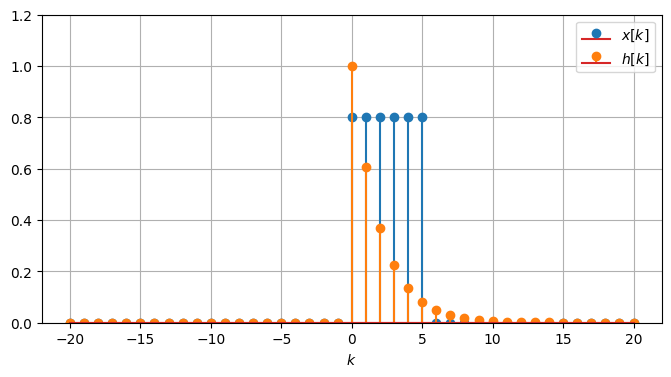

In [33]:
k = np.arange(-20, 21)

plot_signals(k, x(k), h(k), r'$x[k]$', r'$h[k]$', r'$k$')

The **first step** is to substitute $k$ by $\kappa$, in both $x[k]$ and $h[k]$, to yield $x[\kappa]$ and $h[\kappa]$.
Note, the horizontal axis of the plot now represents $\kappa$, which is our temporal helper variable for the summation. The plot is depicted below.

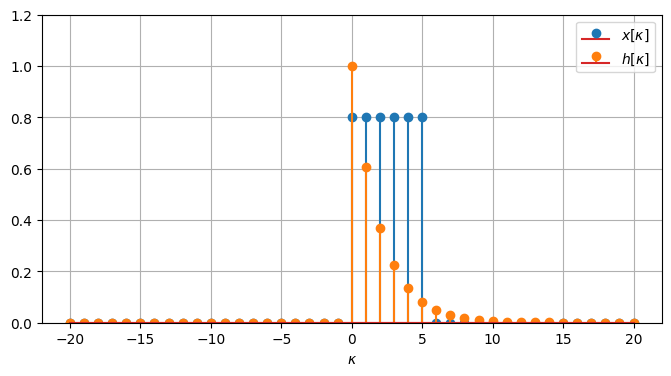

In [34]:
kappa = np.arange(-20, 21)

x1 = x(kappa)
h1 = h(kappa)

plot_signals(kappa, x1, h1, r'$x[\kappa]$', r'$h[\kappa]$', r'$\kappa$')

The **second step** is to time-reverse $h[\kappa]$ at the ordinate (i.e. for $\kappa=0$) axis to yield $h[-\kappa]$

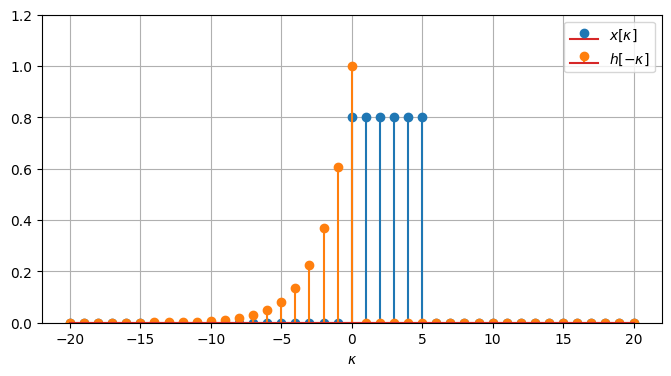

In [35]:
h2 = h(kappa[::-1])  # Python's elegant array reversal

plot_signals(k, x1, h2, r'$x[\kappa]$', r'$h[-\kappa]$', r'$\kappa$')

In the **third step** the impulse response $h[-\kappa]$ is shifted by $k$ samples to yield $h[k - \kappa]$.
The shift is performed to the **right** for $k>0$ and to the **left** for $k<0$.

For the **fourth step** it is often useful to split the calculation of the result according to the overlap between $h[k-\kappa]$ and $x[\kappa]$.
For the given example three different cases need to be considered

1. no overlap for $k<0$,
2. partial overlap for $0 \leq k < 6$, and
3. full overlap for $k \geq 6$ (note that the chosen impulse response $h[k]$ is infinite and decays asymptotically).

The first case, no overlap, is illustrated below for $k= - 5$ (shift to left).

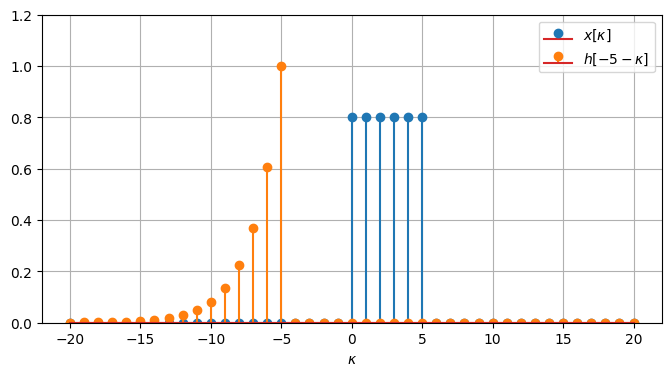

In [36]:
h3 = h(-5 + kappa[::-1])

plot_signals(k, x1, h3, r'$x[\kappa]$', r'$h[-5 -\kappa]$', r'$\kappa$')

From this it becomes clear that the convolution result for the first case is given as

\begin{equation}
y[k] = 0 \qquad \text{for } k < 0
\end{equation}

The second case, i.e. the partial overlap, is illustrated below for $k = 3$ (shift to the right). 

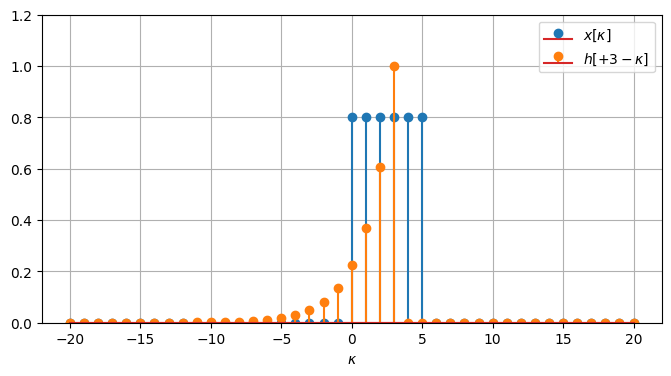

In [37]:
h4 = h(3 + kappa[::-1])

plot_signals(k, x1, h4, r'$x[\kappa]$', r'$h[+3 -\kappa]$', r'$\kappa$')

Hence, for the second case the convolution sum degenerates to

\begin{equation}
y[k] = \frac{4}{5} \sum_{\kappa=0}^{k} e^{-\frac{k - \kappa}{2}}  \qquad \text{for } 0 \leq k < 6
\end{equation}

The third case, full overlap, is illustrated below for $k = 10$.

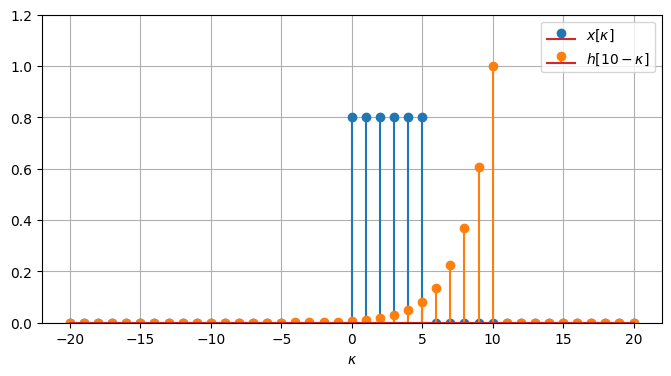

In [38]:
h5 = h(10 + kappa[::-1])

plot_signals(k, x1, h5, r'$x[\kappa]$', r'$h[10 -\kappa]$', r'$\kappa$')

For the third case the convolution sum degenerates to

\begin{equation}
y[k] = \frac{4}{5} \sum_{\kappa=0}^{5} e^{-\frac{k - \kappa}{2}}  \qquad \text{for } k \geq 6
\end{equation}

The overall result is composed from the three individual results. As alternative and in order to plot the result, the convolution is evaluated numerically with numpy's `convolve`.
Note that `convolve` performs plain convolution and does not care about any alignment regarding $k$, we've made up.
So, you might need to adapt the returned result to proper alignment with respect to $k$ if both signals did not start exact at $k=0$.

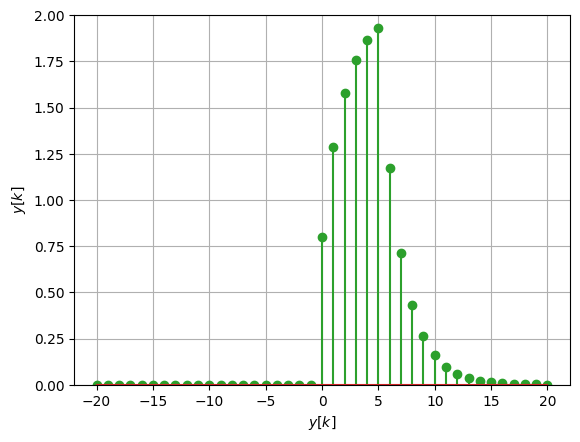

In [39]:
plt.stem(k, y(k), linefmt='C2-', markerfmt='C2o')
plt.xlabel(r'$y[k]$')
plt.ylabel(r'$y[k]$')
plt.ylim([0, 2])
plt.grid(True)

The entire process is illustrated in the following animation. The upper plot shows the integrands $h[k-\kappa]$ and $x[\kappa]$ of the convolution sum, the lower plot the result $y[k] = x[k] * h[k]$ of the convolution. The red dot in the lower plot indicates the particular time instant $k$ for which the result of the convolution sum is computed. The time instant $k$ is varied in the animation.